In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
import numpy as np
from nba_api.stats.static import teams
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

sns.set()

pd.set_option('display.max_columns', None)

## Loading the data

In [2]:
df = pd.read_csv('../../data/merged_tracking_shots.csv')

## Initial glance

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,EVENTMSGACTIONTYPE,SCOREMARGIN,AVERAGE_DEFENDER_DISTANCE,SHOOTER_DEFENDER_DISTANCE,OFFENSE_SPACING,DEFENSE_SPACING,SHOT_CLOCK,ACTION_TYPE_SIMPLIFIED
0,0,0,0,9547,9547.0,Shot Chart Detail,21500433,72,201589,Darrell Arthur,1610612743,Denver Nuggets,1,3,41,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,64,169,1,1,20151223,PHX,DEN,1.0,4.0,9.850909,16.651954,646.662757,107.603674,14.38,Jump Shot
1,1,1,2,9549,9549.0,Shot Chart Detail,21500433,91,201589,Darrell Arthur,1610612743,Denver Nuggets,1,1,21,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17,171,-1,1,1,20151223,PHX,DEN,1.0,3.0,9.792545,15.191194,433.787390,103.901113,12.14,Jump Shot
2,2,2,5,9552,9552.0,Shot Chart Detail,21500433,127,201589,Darrell Arthur,1610612743,Denver Nuggets,2,9,43,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17,169,-24,1,0,20151223,PHX,DEN,1.0,16.0,9.551649,8.720667,366.062721,58.935462,8.03,Jump Shot
3,3,3,7,9554,9554.0,Shot Chart Detail,21500433,321,201589,Darrell Arthur,1610612743,Denver Nuggets,3,4,34,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,182,174,1,0,20151223,PHX,DEN,1.0,1.0,7.960229,17.402713,677.392732,267.826654,15.89,Jump Shot
4,4,4,8,9555,9555.0,Shot Chart Detail,21500433,356,201589,Darrell Arthur,1610612743,Denver Nuggets,3,2,14,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,14,146,-21,1,0,20151223,PHX,DEN,1.0,10.0,12.331514,6.678257,913.120564,202.175181,11.94,Jump Shot


## Dropping columns that aren't required

In [4]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'])

df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,EVENTMSGACTIONTYPE,SCOREMARGIN,AVERAGE_DEFENDER_DISTANCE,SHOOTER_DEFENDER_DISTANCE,OFFENSE_SPACING,DEFENSE_SPACING,SHOT_CLOCK,ACTION_TYPE_SIMPLIFIED
0,Shot Chart Detail,21500433,72,201589,Darrell Arthur,1610612743,Denver Nuggets,1,3,41,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,64,169,1,1,20151223,PHX,DEN,1.0,4.0,9.850909,16.651954,646.662757,107.603674,14.38,Jump Shot
1,Shot Chart Detail,21500433,91,201589,Darrell Arthur,1610612743,Denver Nuggets,1,1,21,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17,171,-1,1,1,20151223,PHX,DEN,1.0,3.0,9.792545,15.191194,433.787390,103.901113,12.14,Jump Shot
2,Shot Chart Detail,21500433,127,201589,Darrell Arthur,1610612743,Denver Nuggets,2,9,43,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17,169,-24,1,0,20151223,PHX,DEN,1.0,16.0,9.551649,8.720667,366.062721,58.935462,8.03,Jump Shot
3,Shot Chart Detail,21500433,321,201589,Darrell Arthur,1610612743,Denver Nuggets,3,4,34,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,182,174,1,0,20151223,PHX,DEN,1.0,1.0,7.960229,17.402713,677.392732,267.826654,15.89,Jump Shot
4,Shot Chart Detail,21500433,356,201589,Darrell Arthur,1610612743,Denver Nuggets,3,2,14,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,14,146,-21,1,0,20151223,PHX,DEN,1.0,10.0,12.331514,6.678257,913.120564,202.175181,11.94,Jump Shot


## The columns we are dealing with

Of these columns the ones we will be focusing on will be:

- ACTION_TYPE_SIMPLIFIED: Gives the type of shot that was taken. (Jump Shot, Layup, Hook Shot, and so on)
- SHOT_DISTANCE: Distance between shot and the basket
- SHOT_TYPE: Whether the shot was a 2 pointer or a 3 pointer
- SHOT_ZONE_BASIC: The NBA court is divided into zones, can be seen in figure 1 below
- SHOT_ZONE_AREA: The NBA court is divided into zones, can be seen in figure 2 below
- SCORE_MARGIN: Difference in score between the two teams when the shot was taken
- AVERAGE_DEFENDER_DISTANCE: Average distance between a player in offense and their nearest defender
- SHOOTER_DEFENDER_DISTANCE: Distance between the shooter and their nearest defender
- OFFENSE_SPACING: The area of the polygon that can be drawn from the position of offensive players. We use Convex Hull method to calculate this.
- DEFENSE_SPACING: The area of the polygon that can be drawn from the position of defensive players. We use Convex Hull method to calculate this.

In [5]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'EVENTMSGACTIONTYPE', 'SCOREMARGIN',
       'AVERAGE_DEFENDER_DISTANCE', 'SHOOTER_DEFENDER_DISTANCE',
       'OFFENSE_SPACING', 'DEFENSE_SPACING', 'SHOT_CLOCK',
       'ACTION_TYPE_SIMPLIFIED'],
      dtype='object')

## Checking for null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65342 entries, 0 to 65341
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GRID_TYPE                  65342 non-null  object 
 1   GAME_ID                    65342 non-null  int64  
 2   GAME_EVENT_ID              65342 non-null  int64  
 3   PLAYER_ID                  65342 non-null  int64  
 4   PLAYER_NAME                65342 non-null  object 
 5   TEAM_ID                    65342 non-null  int64  
 6   TEAM_NAME                  65342 non-null  object 
 7   PERIOD                     65342 non-null  int64  
 8   MINUTES_REMAINING          65342 non-null  int64  
 9   SECONDS_REMAINING          65342 non-null  int64  
 10  EVENT_TYPE                 65342 non-null  object 
 11  ACTION_TYPE                65342 non-null  object 
 12  SHOT_TYPE                  65342 non-null  object 
 13  SHOT_ZONE_BASIC            65342 non-null  obj

In [7]:
df.describe()

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,EVENTMSGACTIONTYPE,SCOREMARGIN,AVERAGE_DEFENDER_DISTANCE,SHOOTER_DEFENDER_DISTANCE,OFFENSE_SPACING,DEFENSE_SPACING,SHOT_CLOCK
count,6.534200e+04,65342.000000,6.534200e+04,6.534200e+04,65342.000000,65342.000000,65342.000000,65342.000000,65342.000000,65342.000000,65342.0,65342.000000,6.534200e+04,65342.000000,65342.000000,65342.000000,65342.000000,65342.000000,65342.000000,61777.000000
mean,2.150029e+07,260.270928,2.304794e+05,1.610613e+09,2.504147,5.307872,28.694086,12.701142,-3.359264,82.598145,1.0,0.433305,2.015299e+07,26.478880,-0.348061,8.250992,6.771334,515.026204,210.464076,12.745549
std,1.790811e+02,159.605117,3.131002e+05,8.861245e+00,1.141578,3.480294,17.393653,9.709332,111.558411,86.864255,0.0,0.495536,3.619993e+03,34.364731,10.332627,2.319426,5.015931,183.893118,128.167838,5.796127
min,2.150000e+07,2.000000,7.080000e+02,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-250.000000,-51.000000,1.0,0.000000,2.015103e+07,1.000000,-52.000000,1.500641,0.000000,18.067748,2.501562,0.000000
25%,2.150014e+07,122.000000,2.007680e+05,1.610613e+09,1.000000,2.000000,14.000000,2.000000,-61.000000,7.000000,1.0,0.000000,2.015111e+07,1.000000,-6.000000,6.765017,2.954804,393.360298,136.901899,8.330000
50%,2.150030e+07,259.000000,2.019880e+05,1.610613e+09,2.000000,5.000000,29.000000,13.000000,0.000000,46.000000,1.0,0.000000,2.015121e+07,1.000000,0.000000,7.993134,5.252919,501.567369,186.302547,12.490000
75%,2.150042e+07,394.000000,2.030990e+05,1.610613e+09,4.000000,8.000000,44.000000,23.000000,51.000000,159.000000,1.0,1.000000,2.015122e+07,52.000000,6.000000,9.358872,9.374730,617.108999,248.771872,16.740000
max,2.150066e+07,860.000000,1.626273e+06,1.610613e+09,8.000000,11.000000,59.000000,78.000000,250.000000,771.000000,1.0,1.000000,2.016012e+07,110.000000,50.000000,38.599265,70.699030,2630.510649,2678.686627,24.000000


## We can see here that we have a pretty good distribution for made and missed shots

<AxesSubplot:xlabel='SHOT_MADE_FLAG', ylabel='count'>

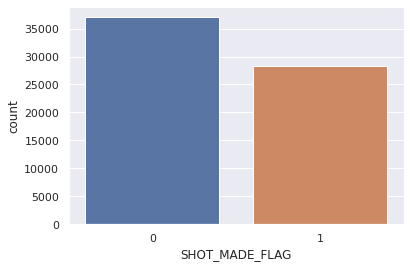

In [8]:
sns.countplot(x='SHOT_MADE_FLAG', data=df)

## Looking at the count of the categorical columns

From the plots below we can infer the following:

- Most shots are taken from the restricted area, and probably this data is for the 15/16 season, we see Mid Range shots quite a bit which has surely changed for better or for worse
- It's surprising to see such a huge majority of shots being taken from the center.
- From the `SHOT_ZONE_RANGE`, it's clear that teams prefer their shots either very close to the basket or out in the 3 point range

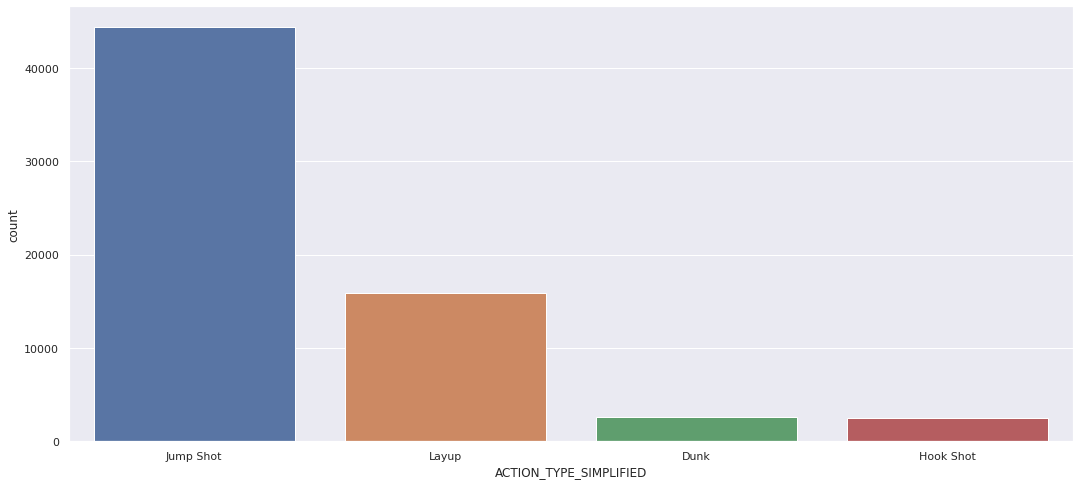

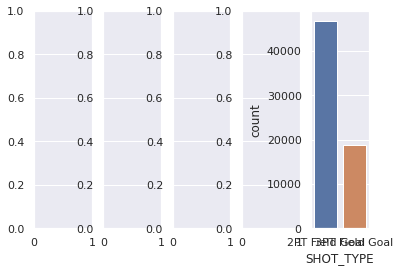

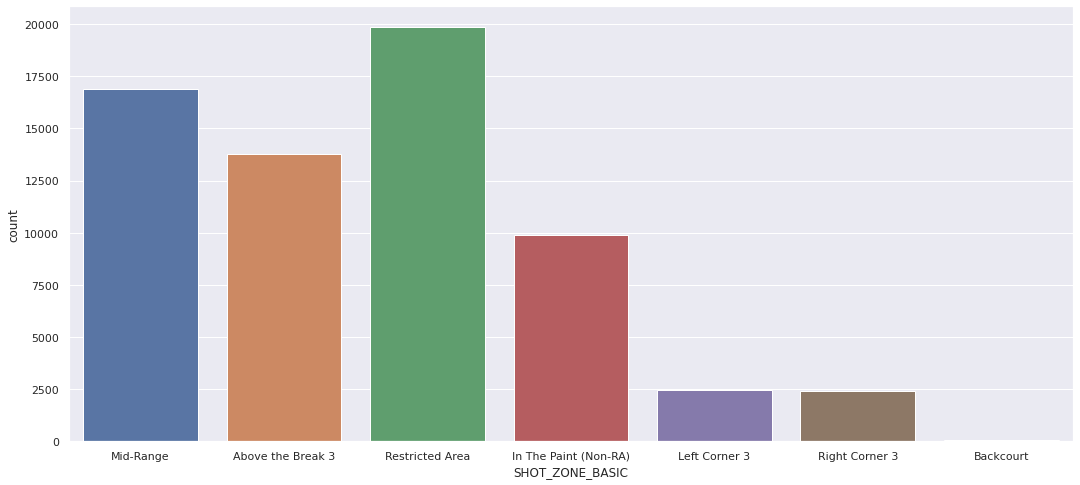

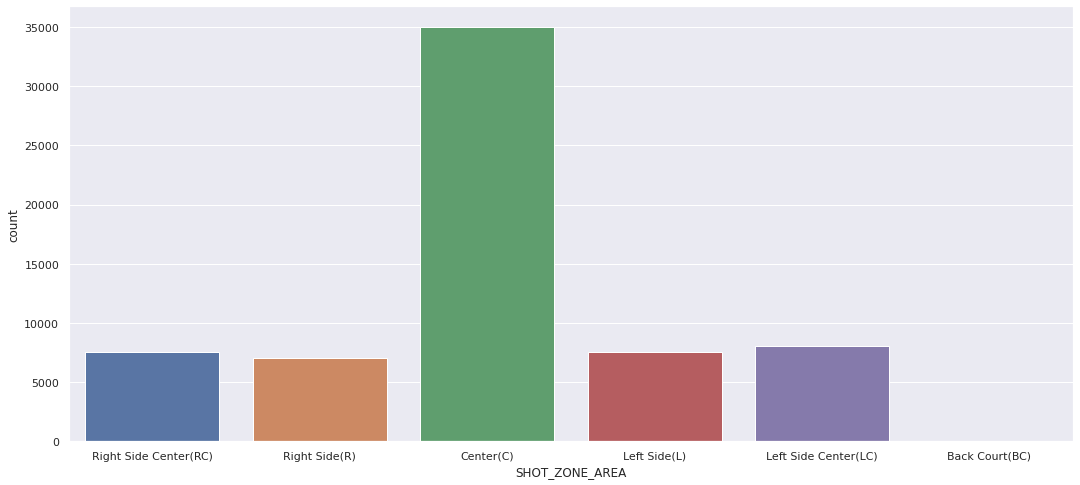

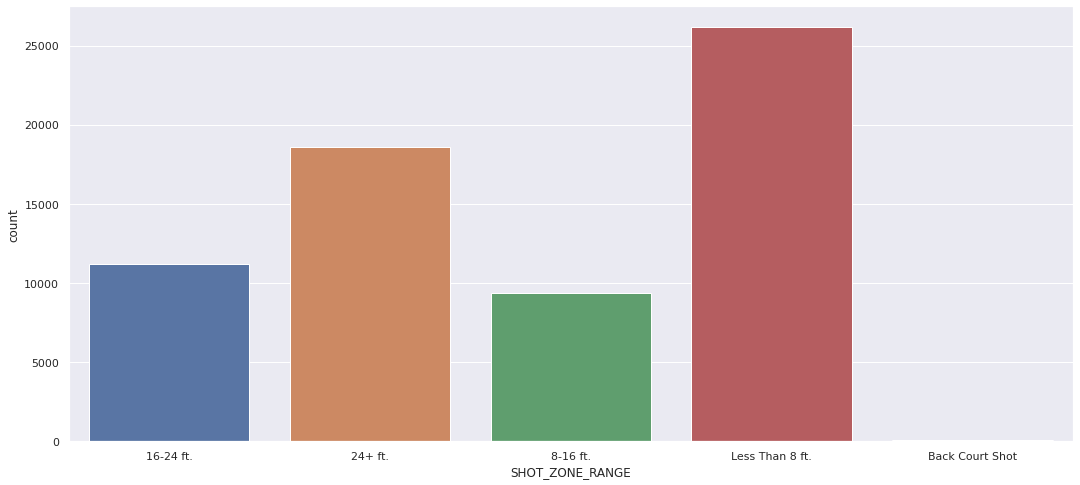

In [9]:
columns_of_interest = ['ACTION_TYPE_SIMPLIFIED', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']

fig, axs = plt.subplots(ncols=len(columns_of_interest))

index = 0
for col in columns_of_interest:
    plt.figure(index, figsize=(18, 8))
    sns.countplot(x=col, data=df)
    index = index + 1

In [10]:
numerical_columns = ['SHOT_DISTANCE', 'SCOREMARGIN', 'AVERAGE_DEFENDER_DISTANCE', 'SHOOTER_DEFENDER_DISTANCE',
       'OFFENSE_SPACING', 'DEFENSE_SPACING', 'SHOT_CLOCK']

## A look at Shooting % based on the following columns:

`ACTION_TYPE_SIMPLIFIED`, `SHOT_TYPE`, `SHOT_ZONE_BASIC`, `SHOT_ZONE_AREA`, `SHOT_ZONE_RANGE`

- We can again see that shots closer to the basket have a high conversion rate.
- But once we get out of the restricted area, the shooting percentage for all the areas seem very identical. Wether it's in the paint, the mid-range, or if you are taking threes.

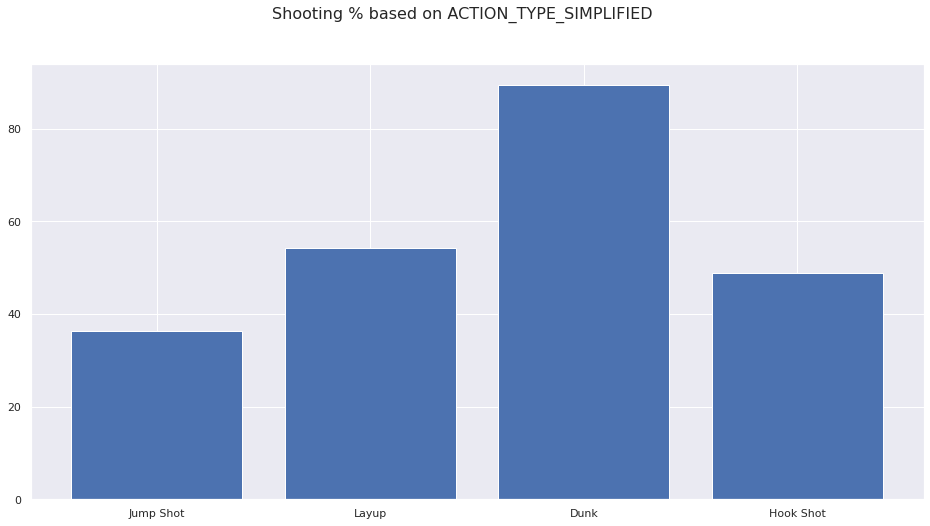

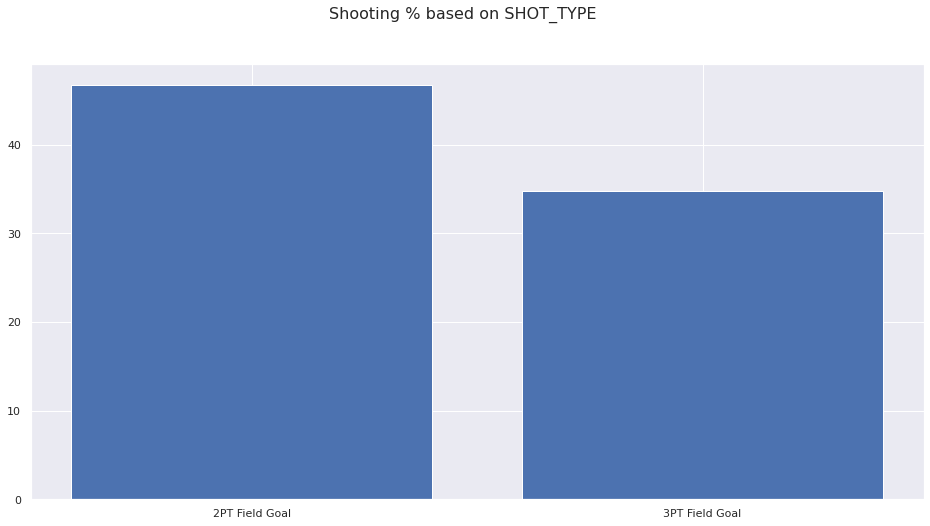

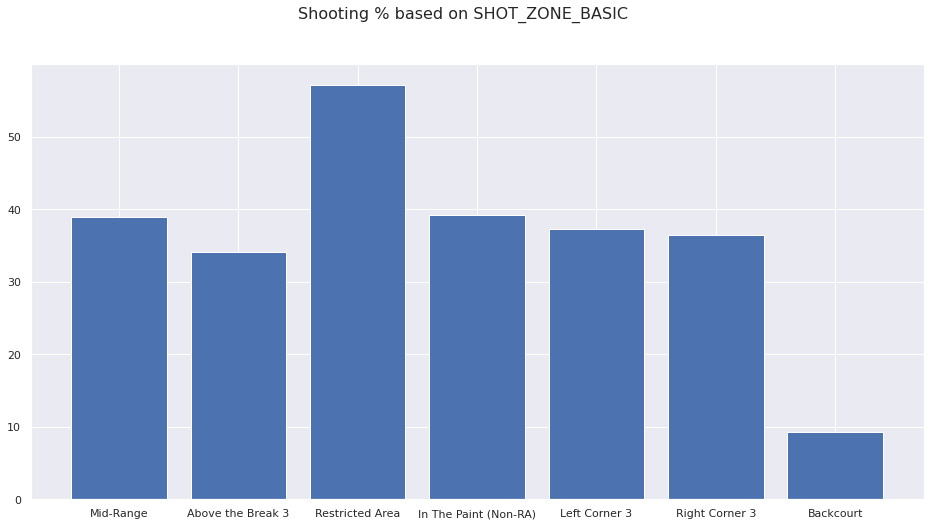

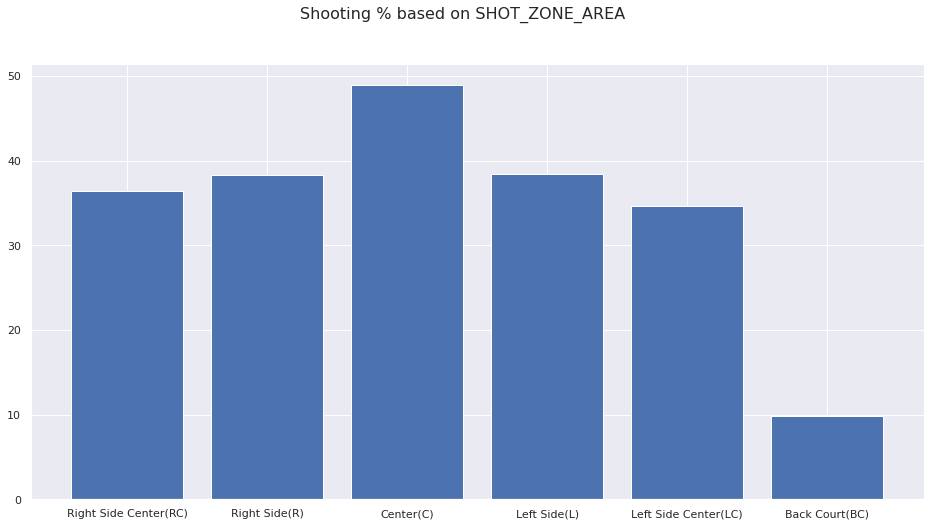

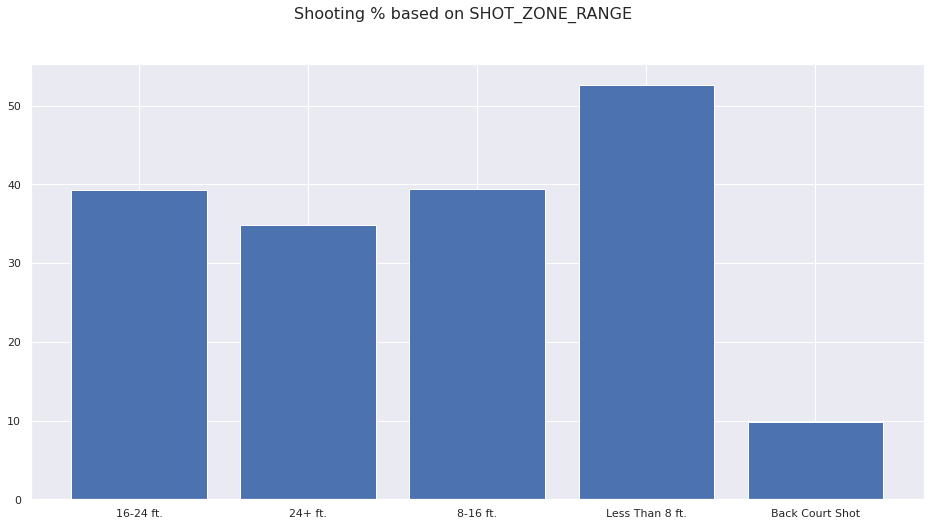

In [11]:
columns_of_interest = ['ACTION_TYPE_SIMPLIFIED', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']

for col in columns_of_interest:
    unique_values = df[col].unique()
    shooting_percentage = {}
    
    for v in unique_values:
        total_shots = len(df[df[col] == v])
        made_shots = len(df[(df[col] == v) & (df['SHOT_MADE_FLAG'] == 1)])
        shooting_percentage[v] = made_shots * 100 / total_shots
    
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.bar(range(len(shooting_percentage)), list(shooting_percentage.values()), align='center')
    plt.xticks(range(len(shooting_percentage)), list(shooting_percentage.keys()))
    fig.suptitle('Shooting % based on {}'.format(col), fontsize=16)

    plt.show()

## Looking at points per shot

- It is no doubt that layups and dunks are the most valuable shots based on this very important metric
- The figures below show exactly why 3s are valued so high by NBA teams. A corner 3 seems to be almost as valauble as a shot in the restricted area, with Above the break threes trailing behind but only by a small margin
- While shots that aren't in the restricted area and aren't threes are shockingly low in value

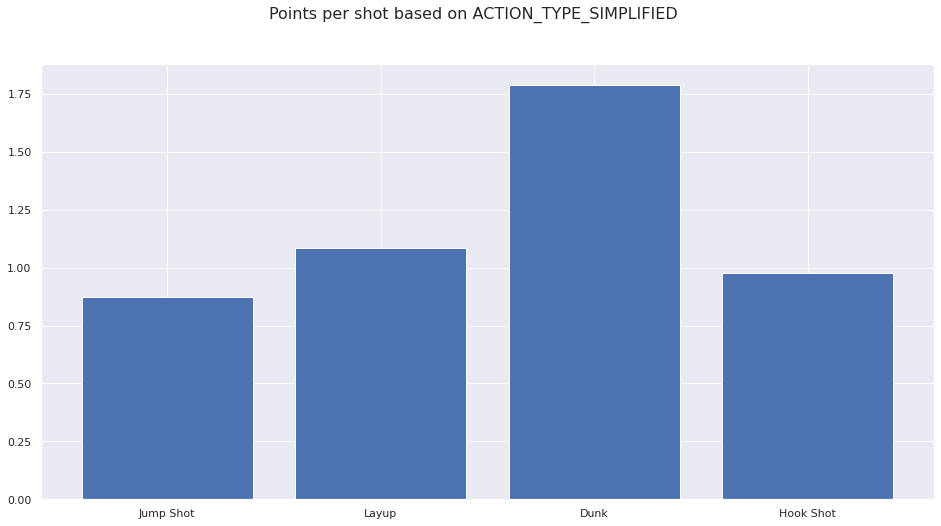

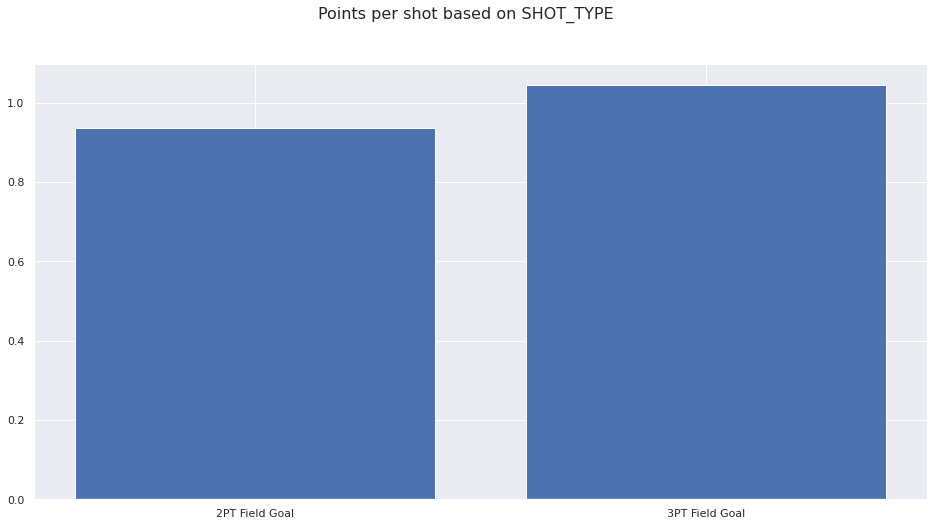

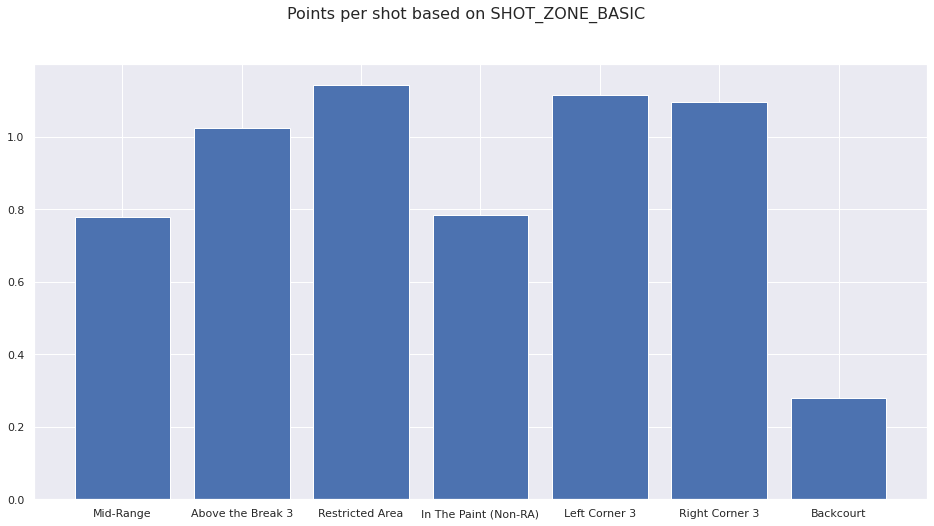

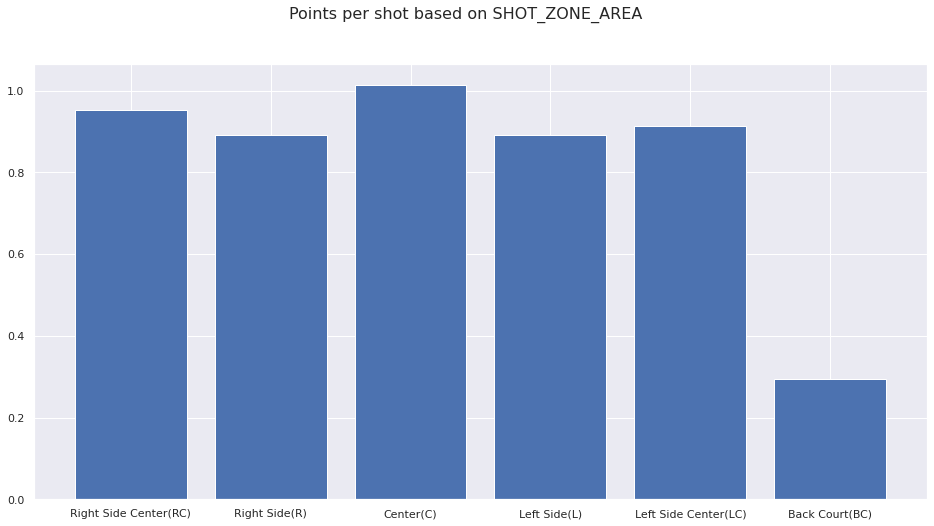

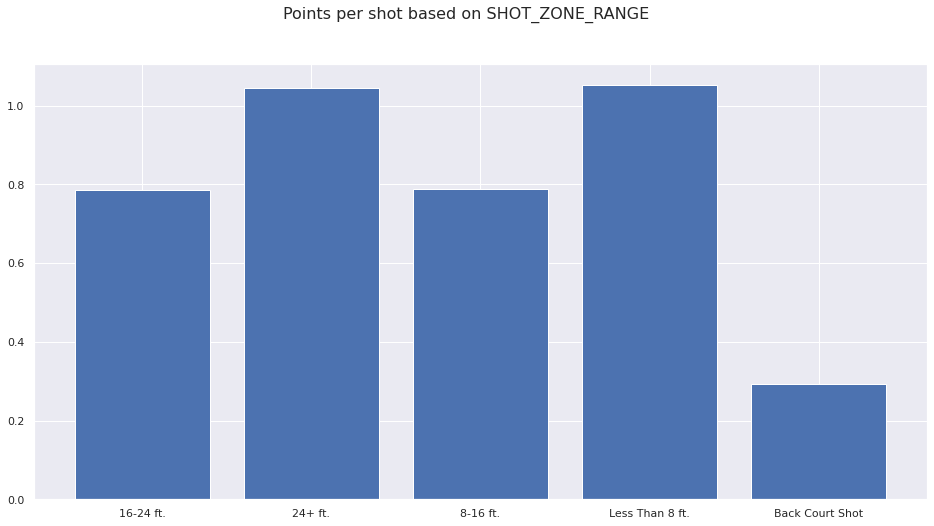

In [12]:
for col in columns_of_interest:
    unique_values = df[col].unique()
    points_per_shot = {}
    
    for v in unique_values:
        total_shots = len(df[df[col] == v])
        made_twos = len(df[(df[col] == v) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
        made_threes = len(df[(df[col] == v) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])
        
        points_per_shot[v] = ((made_twos * 2) + (made_threes * 3)) / total_shots
    
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.bar(range(len(points_per_shot)), list(points_per_shot.values()), align='center')
    plt.xticks(range(len(points_per_shot)), list(points_per_shot.keys()))
    fig.suptitle('Points per shot based on {}'.format(col), fontsize=16)

    plt.show()

## How does spacing impact shooting %?

- Although there doesn't seem to be that big of a gap in shooting % based on spacing, we definitelly see improved shooting % when there is separation between the offense and defense
- We also see that having the offense spaced out doesn't really do much for your shooting %

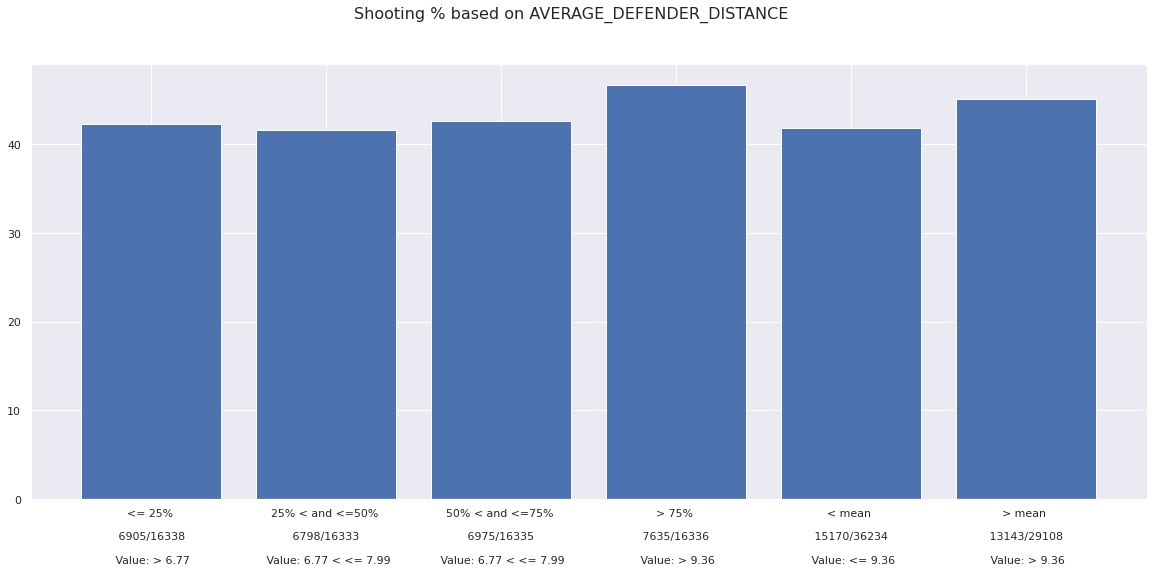

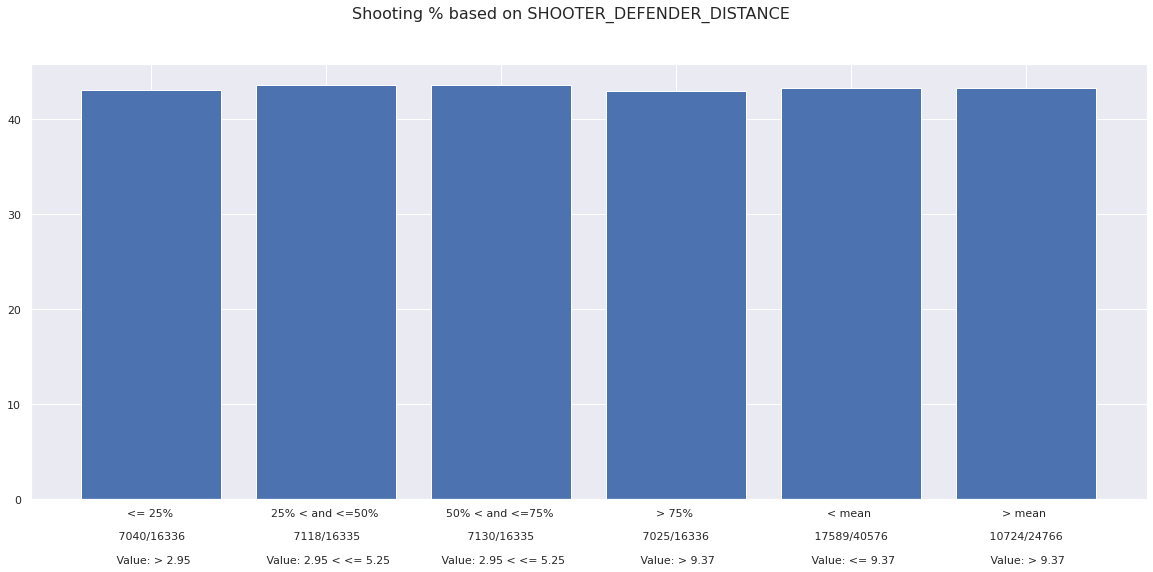

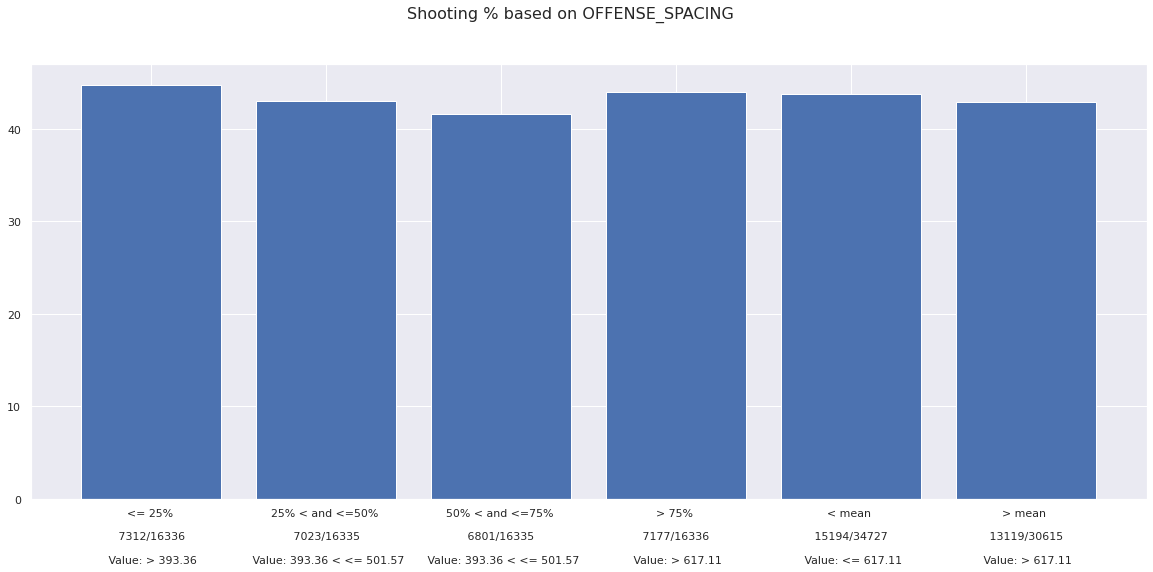

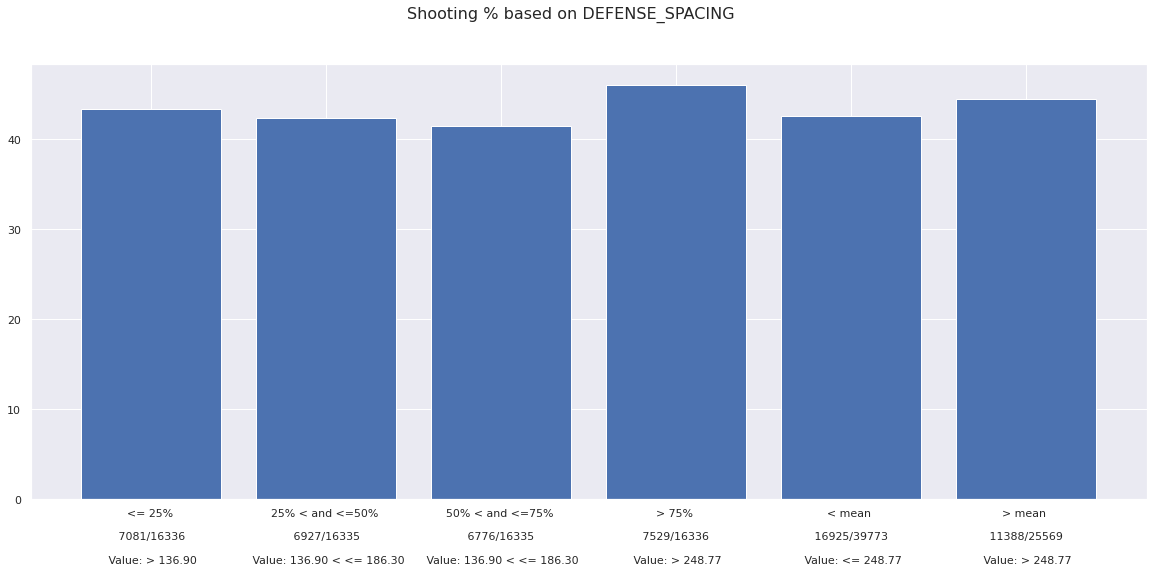

In [13]:
spacing_columns = [ 'AVERAGE_DEFENDER_DISTANCE', 'SHOOTER_DEFENDER_DISTANCE',
'OFFENSE_SPACING', 'DEFENSE_SPACING']
statistical_values = ['25%', '50%', '75%']

for col in spacing_columns:
    desc = df[col].describe()
    
    shooting_percentage = {}
    
    total_shots = len(df[df[col] <= desc['25%']])
    made_shots = len(df[(df[col] <= desc['25%']) & (df['SHOT_MADE_FLAG'] == 1)])
    shooting_percentage['<= 25% \n\n {}/{} \n\n Value: > {:.2f}'.format(made_shots, total_shots, desc['25%'])] = made_shots * 100 / total_shots
    
    total_shots = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%'])])
    made_shots = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%']) & (df['SHOT_MADE_FLAG'] == 1)])
    shooting_percentage['25% < and <=50% \n\n {}/{} \n\n Value: {:.2f} < <= {:.2f}'.format(made_shots, total_shots, desc['25%'], desc['50%'])] = made_shots * 100 / total_shots
    
    total_shots = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%'])])
    made_shots = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%']) & (df['SHOT_MADE_FLAG'] == 1)])
    shooting_percentage['50% < and <=75% \n\n {}/{} \n\n Value: {:.2f} < <= {:.2f}'.format(made_shots, total_shots, desc['25%'], desc['50%'])] = made_shots * 100 / total_shots
        
    total_shots = len(df[df[col] > desc['75%']])
    made_shots = len(df[(df[col] > desc['75%']) & (df['SHOT_MADE_FLAG'] == 1)])
    shooting_percentage['> 75% \n\n {}/{} \n\n Value: > {:.2f}'.format(made_shots, total_shots, desc['75%'])] = made_shots * 100 / total_shots
    
    total_shots = len(df[df[col] <= desc['mean']])
    made_shots = len(df[(df[col] <= desc['mean']) & (df['SHOT_MADE_FLAG'] == 1)])
    shooting_percentage['< mean \n\n {}/{} \n\n Value: <= {:.2f}'.format(made_shots, total_shots, desc['75%'])] = made_shots * 100 / total_shots
    
    total_shots = len(df[df[col] > desc['mean']])
    made_shots = len(df[(df[col] > desc['mean']) & (df['SHOT_MADE_FLAG'] == 1)])
    shooting_percentage['> mean \n\n {}/{} \n\n Value: > {:.2f}'.format(made_shots, total_shots, desc['75%'])] = made_shots * 100 / total_shots
    
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.bar(range(len(shooting_percentage)), list(shooting_percentage.values()), align='center')
    plt.xticks(range(len(shooting_percentage)), list(shooting_percentage.keys()))
    fig.suptitle('Shooting % based on {}'.format(col), fontsize=16)

    plt.show()

## Shooting % based on the shot clock value

- As we can see below, the quality of shots and player's ability to make them is clearly impacted by the shot clock

In [14]:
df['SHOT_CLOCK'].describe()

count    61777.000000
mean        12.745549
std          5.796127
min          0.000000
25%          8.330000
50%         12.490000
75%         16.740000
max         24.000000
Name: SHOT_CLOCK, dtype: float64

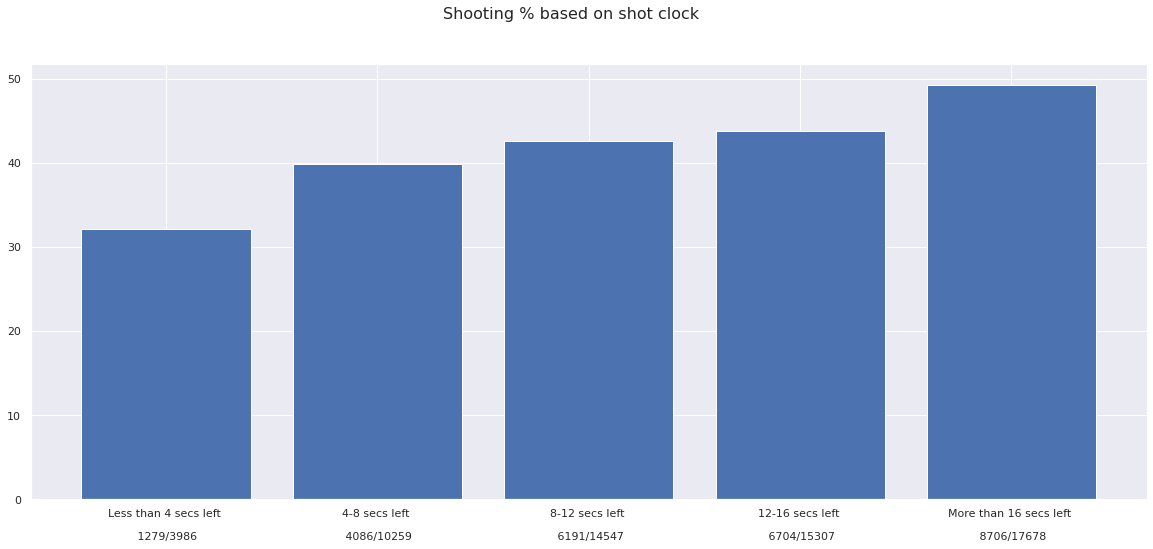

In [15]:
shooting_percentage = {}
    
total_shots = len(df[df['SHOT_CLOCK'] <= 4])
made_shots = len(df[(df['SHOT_CLOCK'] <= 4) & (df['SHOT_MADE_FLAG'] == 1)])
shooting_percentage['Less than 4 secs left \n\n {}/{}'.format(made_shots, total_shots)] = made_shots * 100 / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8)])
made_shots = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8) & (df['SHOT_MADE_FLAG'] == 1)])
shooting_percentage['4-8 secs left \n\n {}/{}'.format(made_shots, total_shots)] = made_shots * 100 / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12)])
made_shots = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12) & (df['SHOT_MADE_FLAG'] == 1)])
shooting_percentage['8-12 secs left \n\n {}/{}'.format(made_shots, total_shots)] = made_shots * 100 / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16)])
made_shots = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16) & (df['SHOT_MADE_FLAG'] == 1)])
shooting_percentage['12-16 secs left \n\n {}/{}'.format(made_shots, total_shots)] = made_shots * 100 / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 16)])
made_shots = len(df[(df['SHOT_CLOCK'] > 16) & (df['SHOT_MADE_FLAG'] == 1)])
shooting_percentage['More than 16 secs left \n\n {}/{}'.format(made_shots, total_shots)] = made_shots * 100 / total_shots

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(range(len(shooting_percentage)), list(shooting_percentage.values()), align='center')
plt.xticks(range(len(shooting_percentage)), list(shooting_percentage.keys()))
fig.suptitle('Shooting % based on shot clock', fontsize=16)

plt.show()

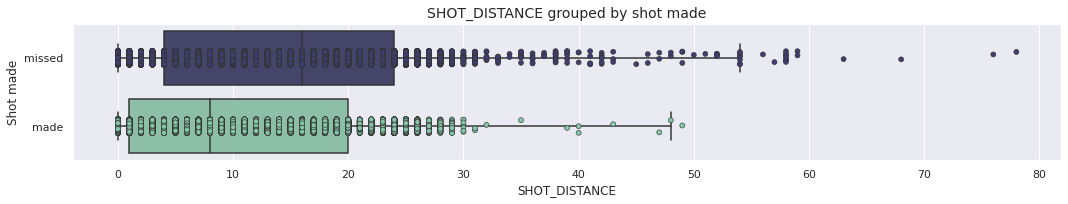

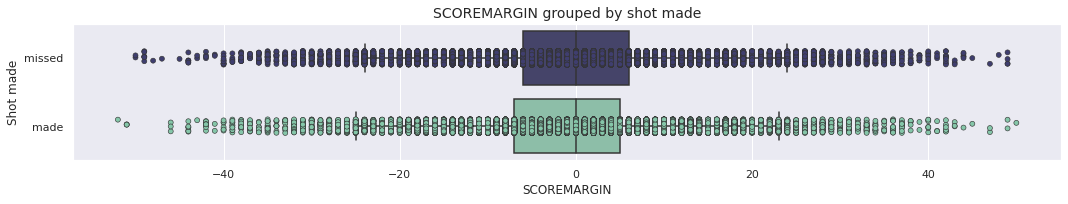

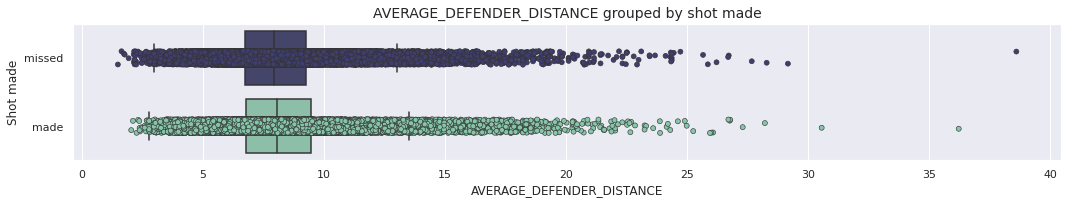

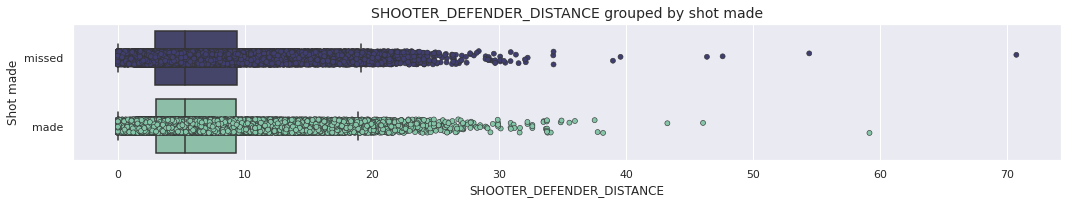

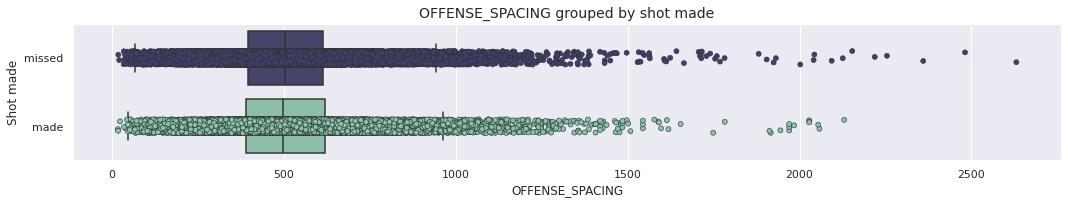

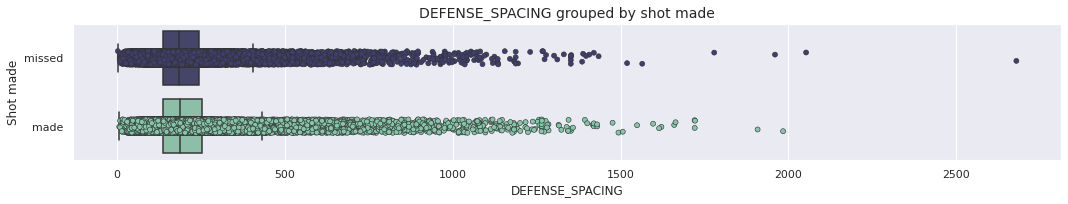

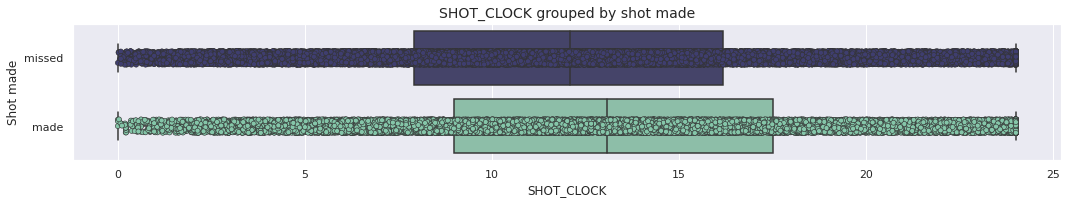

In [16]:
for col in numerical_columns:
    fig, ax = plt.subplots(figsize=(15, 3))

    sns.boxplot(y = 'SHOT_MADE_FLAG', x = col, data = df,
         palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

    sns.stripplot(y = 'SHOT_MADE_FLAG', x = col, data = df,
         linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

    plt.yticks( np.arange(2), ['missed', 'made'])
    plt.title('{} grouped by shot made'.format(col),fontsize= 14)
    plt.ylabel('Shot made')
    plt.tight_layout()

## Points per shot based on spacing

- Although most charts here seem very similar to the FG% we saw above, one chart especially stands out. We can see above that FG% is very similar when we consider the distance between the shooter and their nearest defender. But it looks like players make more threes when their defender is farther away. So despite FG% telling us that `SHOOTER_DEFENDER_DISTANCE` doesn't matter, it looks like it's a really important metric when it comes to making your threes. 

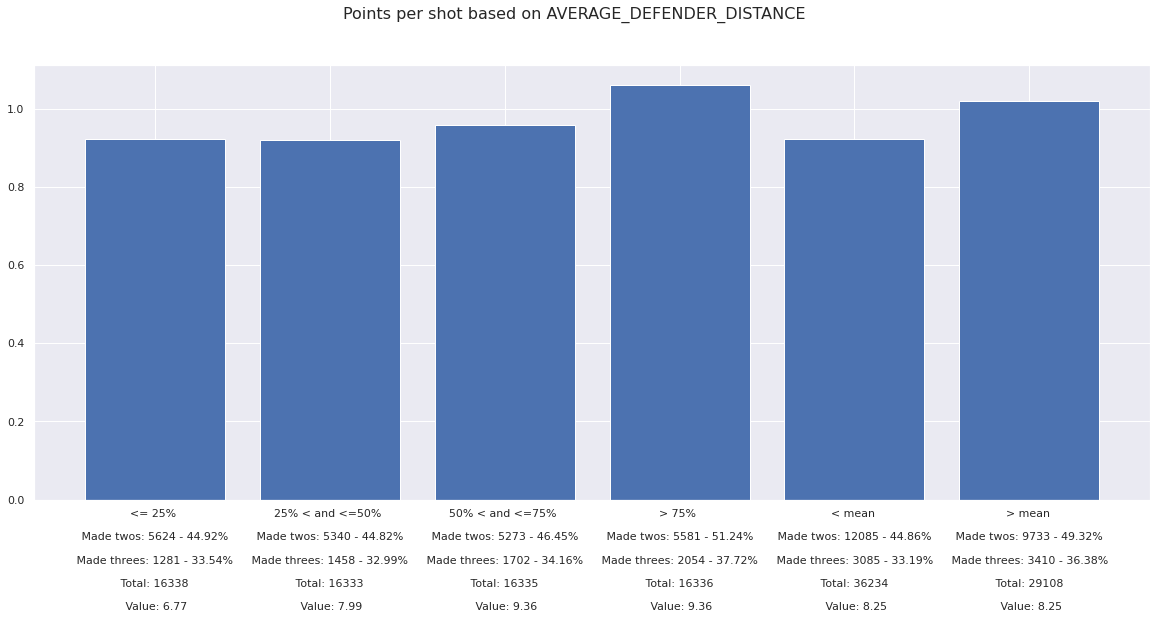

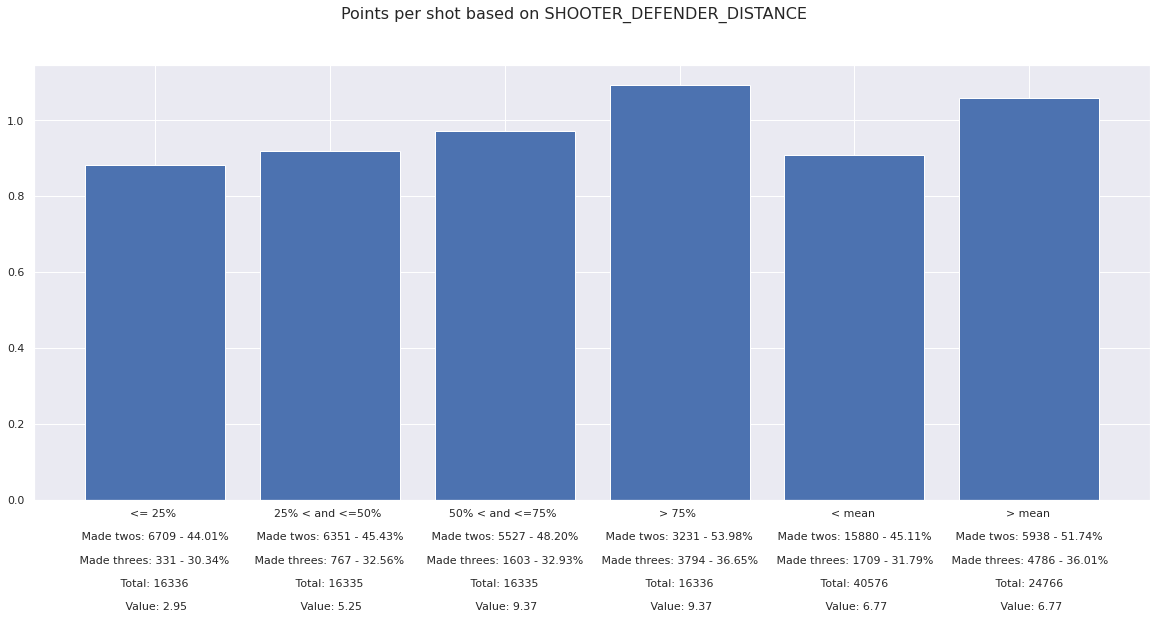

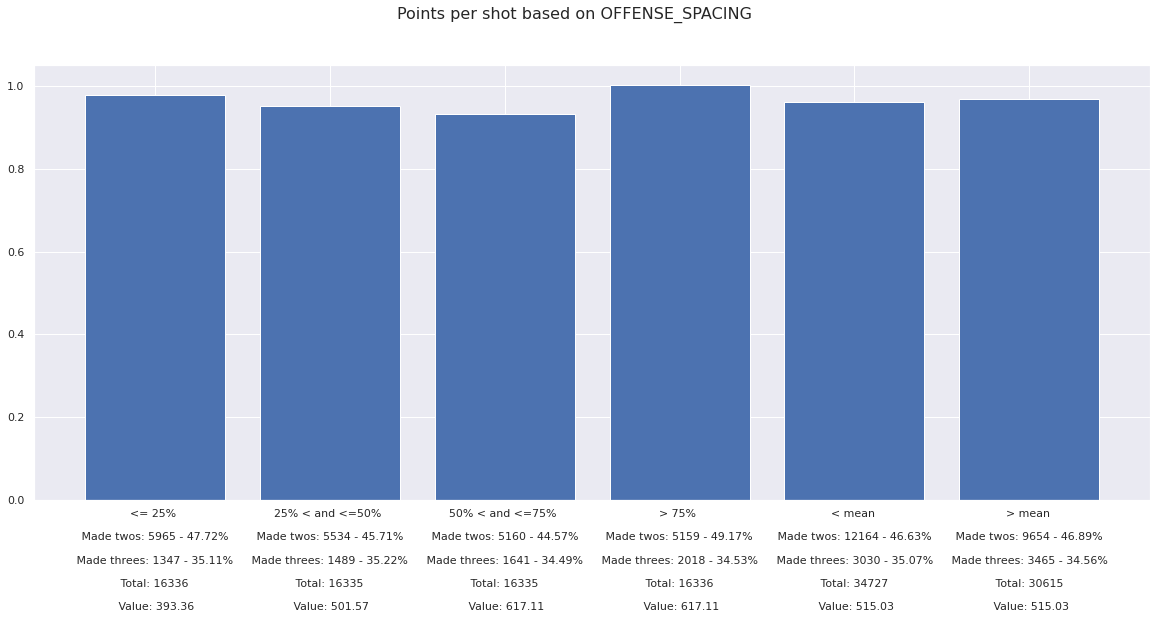

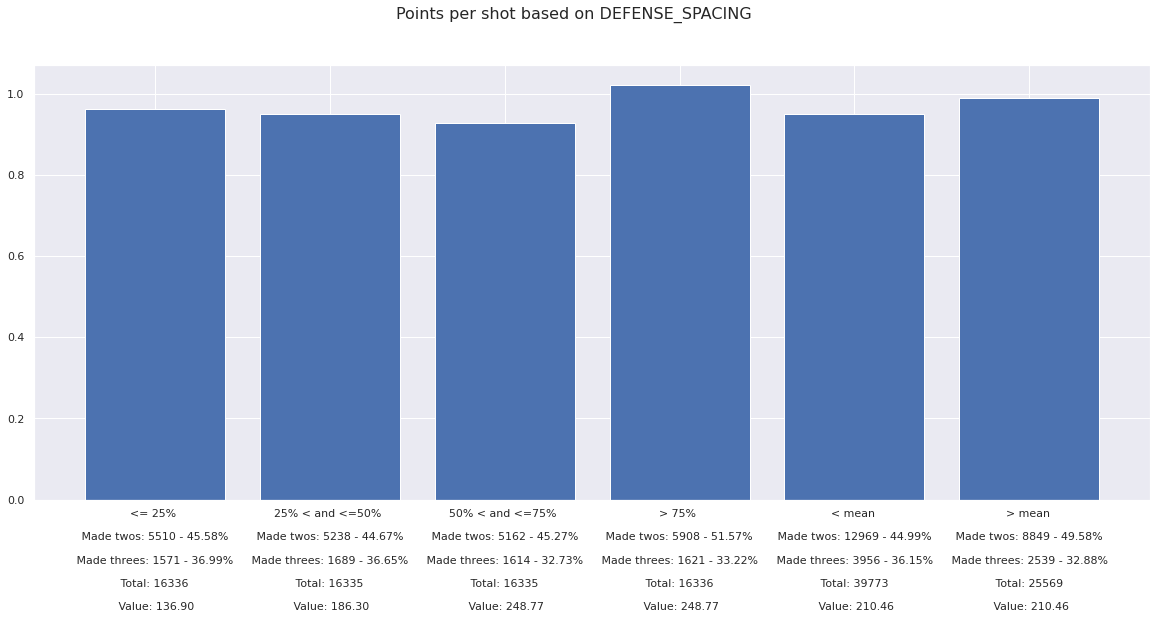

In [17]:
spacing_columns = [ 'AVERAGE_DEFENDER_DISTANCE', 'SHOOTER_DEFENDER_DISTANCE',
'OFFENSE_SPACING', 'DEFENSE_SPACING']
statistical_values = ['25%', '50%', '75%']

for col in spacing_columns:
    desc = df[col].describe()
    
    points_per_shot = {}
    
    total_shots = len(df[df[col] <= desc['25%']])
    made_twos = len(df[(df[col] <= desc['25%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_twos = len(df[(df[col] <= desc['25%']) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_threes = len(df[(df[col] <= desc['25%']) & (df['SHOT_TYPE'] == '3PT Field Goal')])
    made_threes = len(df[(df[col] <= desc['25%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
    points_per_shot['<= 25% \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {} \n\n Value: {:.2f}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots, desc['25%'])] = ((made_twos * 2) + (made_threes * 3)) / total_shots
    
    total_shots = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%'])])
    total_twos = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%']) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_threes = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%']) & (df['SHOT_TYPE'] == '3PT Field Goal')])
    made_twos = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    made_threes = len(df[(df[col] > desc['25%']) & (df[col] <= desc['50%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
    points_per_shot['25% < and <=50% \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {} \n\n Value: {:.2f}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots, desc['50%'])] = ((made_twos * 2) + (made_threes * 3)) / total_shots
    
    total_shots = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%'])])
    total_twos = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%']) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_threes = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%']) & (df['SHOT_TYPE'] == '3PT Field Goal')])
    made_twos = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    made_threes = len(df[(df[col] > desc['50%']) & (df[col] <= desc['75%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
    points_per_shot['50% < and <=75% \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {} \n\n Value: {:.2f}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots, desc['75%'])] = ((made_twos * 2) + (made_threes * 3)) / total_shots
        
    total_shots = len(df[df[col] > desc['75%']])
    total_twos = len(df[(df[col] > desc['75%']) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_threes = len(df[(df[col] > desc['75%']) & (df['SHOT_TYPE'] == '3PT Field Goal')])
    made_twos = len(df[(df[col] > desc['75%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    made_threes = len(df[(df[col] > desc['75%']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')]) 
    points_per_shot['> 75% \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {} \n\n Value: {:.2f}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots, desc['75%'])] = ((made_twos * 2) + (made_threes * 3)) / total_shots
    
    total_shots = len(df[df[col] <= desc['mean']])
    total_twos = len(df[(df[col] <= desc['mean']) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_threes = len(df[(df[col] <= desc['mean']) & (df['SHOT_TYPE'] == '3PT Field Goal')])
    made_twos = len(df[(df[col] <= desc['mean']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    made_threes = len(df[(df[col] <= desc['mean']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')]) 
    points_per_shot['< mean \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {} \n\n Value: {:.2f}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots, desc['mean'])] = ((made_twos * 2) + (made_threes * 3)) / total_shots
    
    total_shots = len(df[df[col] > desc['mean']])
    total_twos = len(df[(df[col] > desc['mean']) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    total_threes = len(df[(df[col] > desc['mean']) & (df['SHOT_TYPE'] == '3PT Field Goal')])
    made_twos = len(df[(df[col] > desc['mean']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
    made_threes = len(df[(df[col] > desc['mean']) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')]) 
    points_per_shot['> mean \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {} \n\n Value: {:.2f}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots, desc['mean'])] = ((made_twos * 2) + (made_threes * 3)) / total_shots
    
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.bar(range(len(points_per_shot)), list(points_per_shot.values()), align='center')
    plt.xticks(range(len(points_per_shot)), list(points_per_shot.keys()))
    fig.suptitle('Points per shot based on {}'.format(col), fontsize=16)

    plt.show()

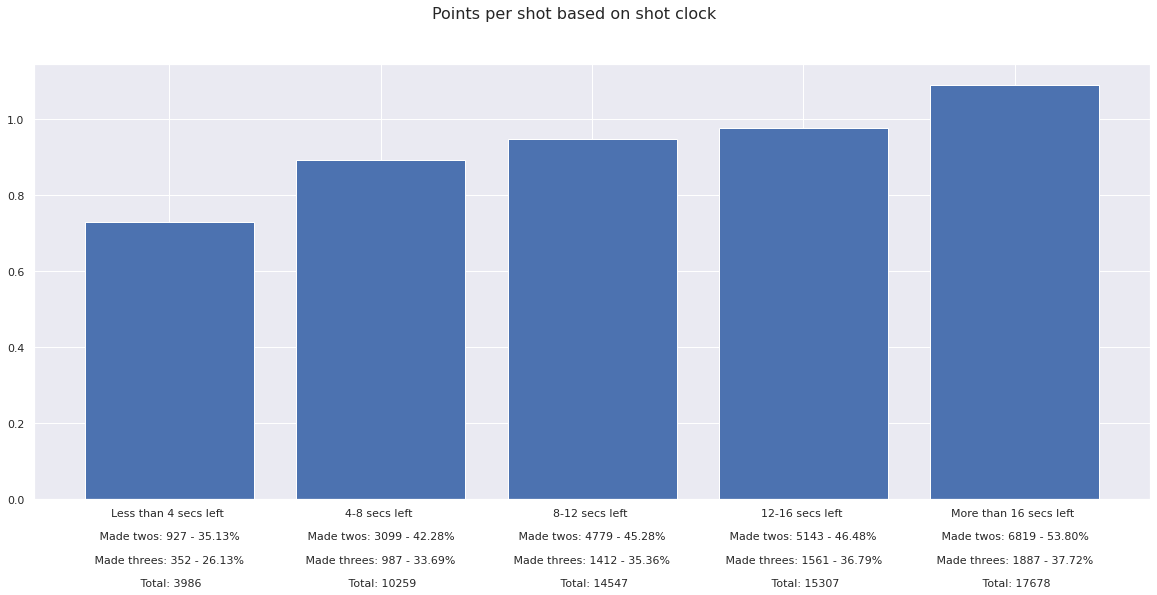

In [18]:
points_per_shot = {}
    
total_shots = len(df[df['SHOT_CLOCK'] <= 4])
total_twos = len(df[(df['SHOT_CLOCK'] <= 4) & (df['SHOT_TYPE'] == '2PT Field Goal')])
total_threes = len(df[(df['SHOT_CLOCK'] <= 4) & (df['SHOT_TYPE'] == '3PT Field Goal')])
made_twos = len(df[(df['SHOT_CLOCK'] <= 4) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
made_threes = len(df[(df['SHOT_CLOCK'] <= 4) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
points_per_shot['Less than 4 secs left \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots)] = ((made_twos * 2) + (made_threes * 3)) / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8)])
total_twos = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8) & (df['SHOT_TYPE'] == '2PT Field Goal')])
total_threes = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8) & (df['SHOT_TYPE'] == '3PT Field Goal')])
made_twos = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
made_threes = len(df[(df['SHOT_CLOCK'] > 4) & (df['SHOT_CLOCK'] <= 8) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
points_per_shot['4-8 secs left \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots)] = ((made_twos * 2) + (made_threes * 3)) / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12)])
total_twos = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12) & (df['SHOT_TYPE'] == '2PT Field Goal')])
total_threes = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12) & (df['SHOT_TYPE'] == '3PT Field Goal')])
made_twos = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
made_threes = len(df[(df['SHOT_CLOCK'] > 8) & (df['SHOT_CLOCK'] <= 12) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
points_per_shot['8-12 secs left \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots)] = ((made_twos * 2) + (made_threes * 3)) / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16)])
total_twos = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16) & (df['SHOT_TYPE'] == '2PT Field Goal')])
total_threes = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16) & (df['SHOT_TYPE'] == '3PT Field Goal')])
made_twos = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
made_threes = len(df[(df['SHOT_CLOCK'] > 12) & (df['SHOT_CLOCK'] <= 16) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
points_per_shot['12-16 secs left \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots)] = ((made_twos * 2) + (made_threes * 3)) / total_shots

total_shots = len(df[(df['SHOT_CLOCK'] > 16)])
total_twos = len(df[(df['SHOT_CLOCK'] > 16) & (df['SHOT_TYPE'] == '2PT Field Goal')])
total_threes = len(df[(df['SHOT_CLOCK'] > 16) & (df['SHOT_TYPE'] == '3PT Field Goal')])
made_twos = len(df[(df['SHOT_CLOCK'] > 16) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '2PT Field Goal')])
made_threes = len(df[(df['SHOT_CLOCK'] > 16) & (df['SHOT_MADE_FLAG'] == 1) & (df['SHOT_TYPE'] == '3PT Field Goal')])    
points_per_shot['More than 16 secs left \n\n Made twos: {} - {:.2f}% \n\n Made threes: {} - {:.2f}% \n\n Total: {}'.format(made_twos, made_twos * 100 / total_twos, made_threes, made_threes * 100 / total_threes, total_shots)] = ((made_twos * 2) + (made_threes * 3)) / total_shots

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(range(len(points_per_shot)), list(points_per_shot.values()), align='center')
plt.xticks(range(len(points_per_shot)), list(points_per_shot.keys()))
fig.suptitle('Points per shot based on shot clock', fontsize=16)

plt.show()

## Where do NBA teams shoot from?

<img src='../../images/hexbin of all shots.png'>

## Shooting % based on zones

<img src='../../images/Shooting percentage based on zones.jpg'>

## Points per shot based on zones

<img src='../../images/Points per shot based on zones.jpg'>

In [19]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'EVENTMSGACTIONTYPE', 'SCOREMARGIN',
       'AVERAGE_DEFENDER_DISTANCE', 'SHOOTER_DEFENDER_DISTANCE',
       'OFFENSE_SPACING', 'DEFENSE_SPACING', 'SHOT_CLOCK',
       'ACTION_TYPE_SIMPLIFIED'],
      dtype='object')

In [20]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,EVENTMSGACTIONTYPE,SCOREMARGIN,AVERAGE_DEFENDER_DISTANCE,SHOOTER_DEFENDER_DISTANCE,OFFENSE_SPACING,DEFENSE_SPACING,SHOT_CLOCK,ACTION_TYPE_SIMPLIFIED
0,Shot Chart Detail,21500433,72,201589,Darrell Arthur,1610612743,Denver Nuggets,1,3,41,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,64,169,1,1,20151223,PHX,DEN,1.0,4.0,9.850909,16.651954,646.662757,107.603674,14.38,Jump Shot
1,Shot Chart Detail,21500433,91,201589,Darrell Arthur,1610612743,Denver Nuggets,1,1,21,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17,171,-1,1,1,20151223,PHX,DEN,1.0,3.0,9.792545,15.191194,433.787390,103.901113,12.14,Jump Shot
2,Shot Chart Detail,21500433,127,201589,Darrell Arthur,1610612743,Denver Nuggets,2,9,43,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,17,169,-24,1,0,20151223,PHX,DEN,1.0,16.0,9.551649,8.720667,366.062721,58.935462,8.03,Jump Shot
3,Shot Chart Detail,21500433,321,201589,Darrell Arthur,1610612743,Denver Nuggets,3,4,34,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,182,174,1,0,20151223,PHX,DEN,1.0,1.0,7.960229,17.402713,677.392732,267.826654,15.89,Jump Shot
4,Shot Chart Detail,21500433,356,201589,Darrell Arthur,1610612743,Denver Nuggets,3,2,14,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,14,146,-21,1,0,20151223,PHX,DEN,1.0,10.0,12.331514,6.678257,913.120564,202.175181,11.94,Jump Shot


In [21]:
team_ids = df['TEAM_ID'].unique()
teams_array = []
for team_id in team_ids:
    team_df = df[df['TEAM_ID'] == team_id]
    team = teams.find_team_name_by_id(team_id)
    
    shots_made = len(team_df[team_df['SHOT_MADE_FLAG'] == 1])
    shots_taken = len(team_df)
    two_point_shots = len(team_df[team_df['SHOT_TYPE'] == '2PT Field Goal'])
    three_point_shots = len(team_df[team_df['SHOT_TYPE'] == '3PT Field Goal'])
    two_point_shots_made = len(team_df[(team_df['SHOT_TYPE'] == '2PT Field Goal') & (team_df['SHOT_MADE_FLAG'] == 1)])
    three_point_shots_made = len(team_df[(team_df['SHOT_TYPE'] == '3PT Field Goal') & (team_df['SHOT_MADE_FLAG'] == 1)])
    
    dictionary = {
        "average_offense_spacing": team_df['OFFENSE_SPACING'].describe()['mean'],
        "average_defense_spacing": team_df['DEFENSE_SPACING'].describe()['mean'],
        "shots_taken": shots_taken,
        "shots_made": shots_made,
        "field_goal_percentage": shots_made * 100 / shots_taken,
        "two_point_shots": two_point_shots,
        "three_point_shots": three_point_shots,
        "two_point_shots_made": two_point_shots_made,
        "three_point_shots_made": three_point_shots_made,
        "two_point_percentage": two_point_shots_made * 100 / two_point_shots,
        "three_point_percentage": three_point_shots_made * 100 / three_point_shots,
        "team": team['full_name'],
        "team_abbreviation": team['abbreviation'],
        "points_per_shot": ((two_point_shots_made * 2) + (three_point_shots_made * 3))/ shots_taken,
        "two_points_per_shot": (two_point_shots_made * 2) / two_point_shots,
        "three_points_per_shot": (three_point_shots_made * 2) / three_point_shots
    }
    
    teams_array.append(dictionary)
    
teams_shooting_df = pd.DataFrame(teams_array)

teams_shooting_df.head()

,average_offense_spacing,average_defense_spacing,shots_taken,shots_made,field_goal_percentage,two_point_shots,three_point_shots,two_point_shots_made,three_point_shots_made,two_point_percentage,three_point_percentage,team,team_abbreviation,points_per_shot,two_points_per_shot,three_points_per_shot
0,536.290249,217.905453,2391,972,40.652447,1613,778,712,260,44.141352,33.419023,Denver Nuggets,DEN,0.921790,0.882827,0.668380
1,542.039428,213.876474,2165,891,41.154734,1535,630,660,231,42.996743,36.666667,Phoenix Suns,PHX,0.929792,0.859935,0.733333
2,480.921522,192.261271,1370,604,44.087591,1108,262,518,86,46.750903,32.824427,Milwaukee Bucks,MIL,0.944526,0.935018,0.656489
3,525.765153,207.522480,2001,858,42.878561,1430,571,655,203,45.804196,35.551664,New Orleans Pelicans,NOP,0.959020,0.916084,0.711033
4,495.738937,195.645258,1706,834,48.886284,1323,383,691,143,52.229781,37.336815,San Antonio Spurs,SAS,1.061547,1.044596,0.746736


In [22]:
teams_shooting_df.describe()

,average_offense_spacing,average_defense_spacing,shots_taken,shots_made,field_goal_percentage,two_point_shots,three_point_shots,two_point_shots_made,three_point_shots_made,two_point_percentage,three_point_percentage,points_per_shot,two_points_per_shot,three_points_per_shot
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,515.721400,210.932238,2178.066667,943.766667,43.490045,1555.866667,622.200000,727.266667,216.50000,46.919636,34.764260,0.969674,0.938393,0.695285
std,22.197127,10.549933,461.755117,185.582156,2.244916,355.247921,151.822355,153.722305,56.70173,2.415742,3.078475,0.054838,0.048315,0.061569
min,465.997727,183.923342,1370.000000,604.000000,39.583333,966.000000,262.000000,469.000000,86.00000,42.996743,28.747795,0.868845,0.859935,0.574956
25%,500.400870,206.522108,1930.750000,839.250000,42.028819,1329.250000,520.000000,648.250000,173.25000,45.463285,32.927171,0.933327,0.909266,0.658543
50%,519.067889,210.580549,2114.000000,932.500000,43.528475,1540.000000,629.500000,694.500000,208.00000,46.614070,34.900820,0.968943,0.932281,0.698016
75%,529.602121,218.624038,2371.750000,1028.250000,44.601552,1692.500000,686.500000,786.500000,249.50000,48.492745,36.409091,0.993850,0.969855,0.728182
max,561.187171,232.391370,3854.000000,1596.000000,49.577745,2935.000000,926.000000,1299.000000,324.00000,52.229781,44.782609,1.145057,1.044596,0.895652


In [23]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

## Does better spacing result in higher shooting percentage?

From the charts below we can infer that, although that is not the case always, we do see that among the teams with shooting percentage higher than the league average, the spacing also is better and vice versa

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

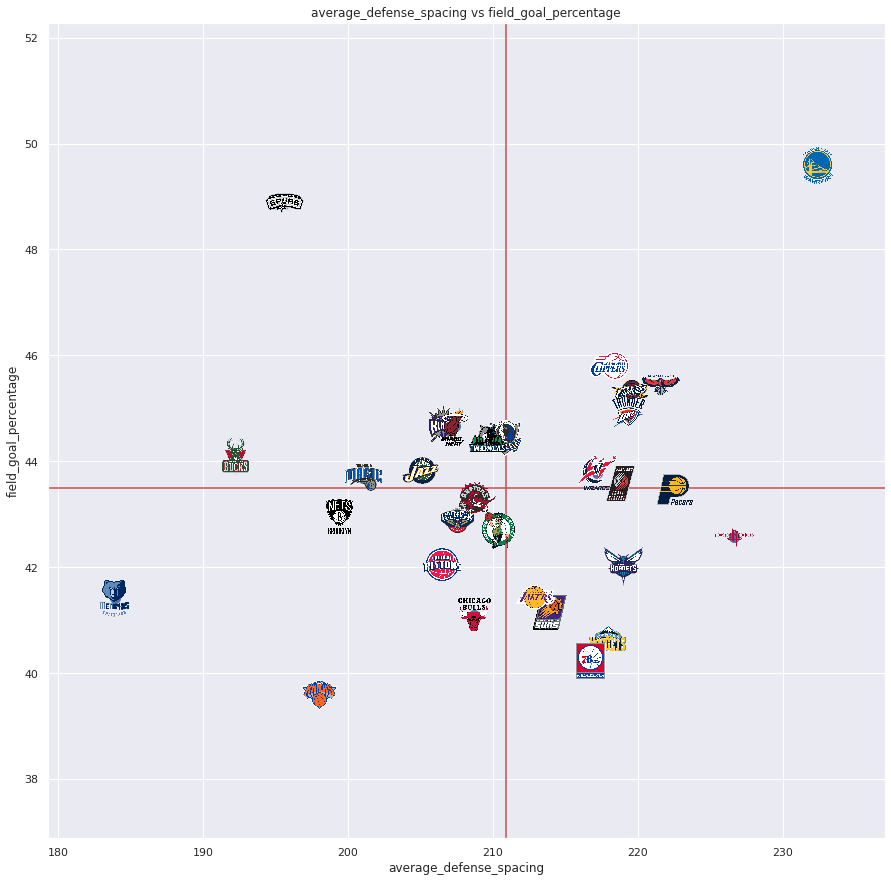

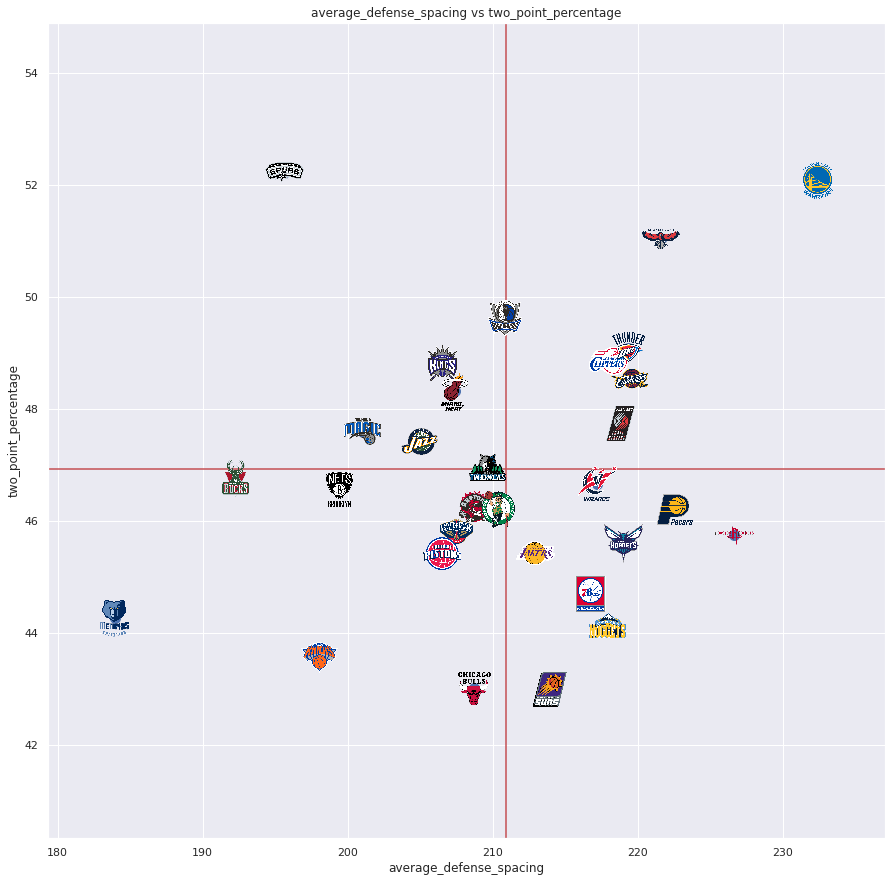

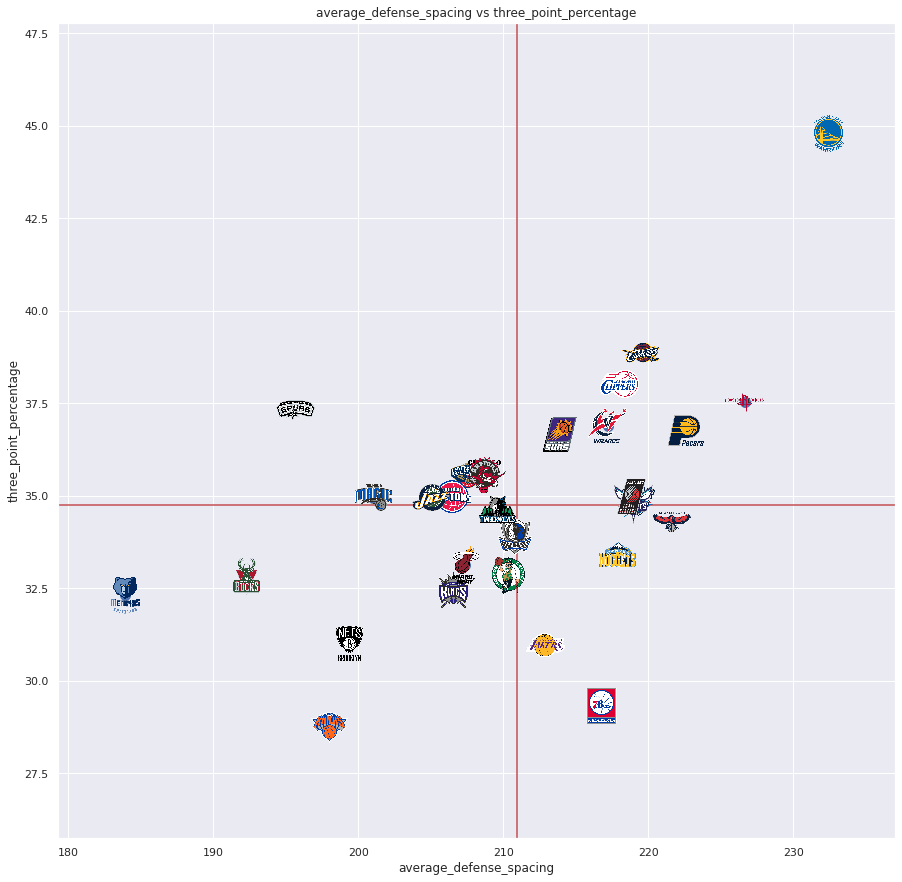

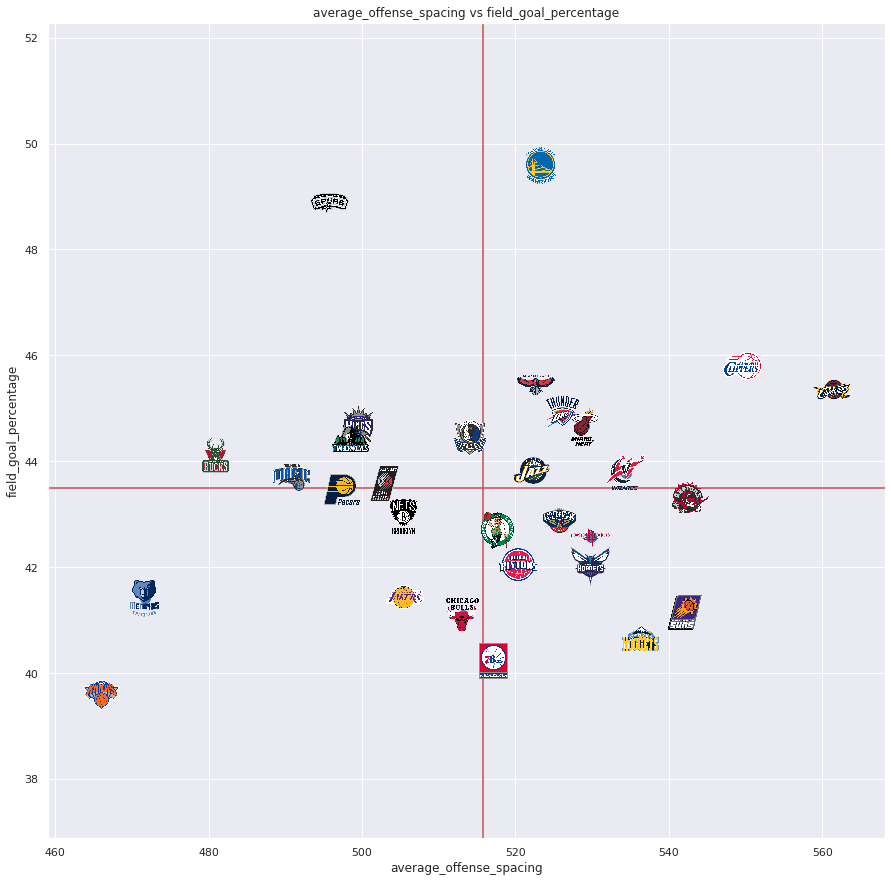

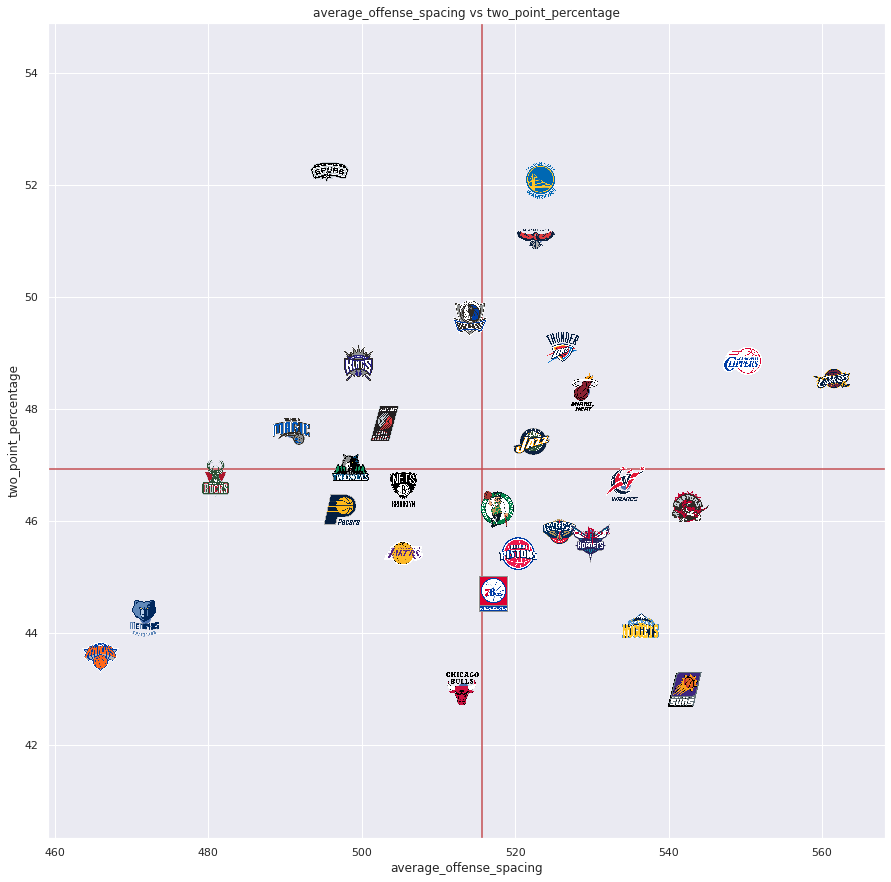

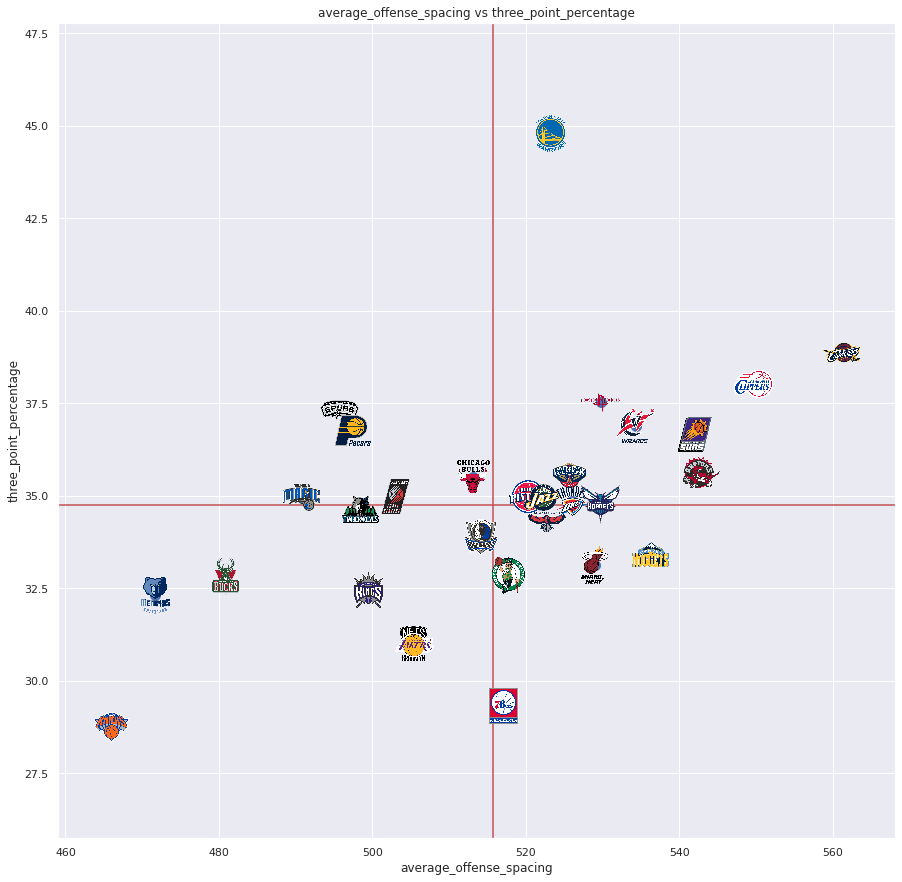

In [24]:
x_columns = ['average_defense_spacing', 'average_offense_spacing']
y_columns = ['field_goal_percentage', 'two_point_percentage', 'three_point_percentage']

for x_col in x_columns:
    x_min = teams_shooting_df[x_col].describe()['min'] - 2
    x_max = teams_shooting_df[x_col].describe()['max'] + 2
    x_mean = teams_shooting_df[x_col].describe()['mean']
    
    for y_col in y_columns:
        y_min = teams_shooting_df[y_col].describe()['min'] - 2
        y_max = teams_shooting_df[y_col].describe()['max'] + 2

        ax = teams_shooting_df.plot.scatter(x=x_col, y=y_col, ylim=(y_min, y_max), xlim=(x_min, x_max), figsize=(15, 15), s=100)

        for i, point in teams_shooting_df.iterrows():
            imscatter(point[x_col], point[y_col], '../../logo/{}.png'.format(point['team_abbreviation']), zoom=0.04, ax=ax)


        y_mean = teams_shooting_df[y_col].describe()['mean']
        ax.axline((x_min, y_mean), (x_max, y_mean), c='r')
        ax.axline((x_mean, y_min), (x_mean, y_max), c='r')
        ax.set_title('{} vs {}'.format(x_col, y_col))
        
        plt.savefig('../../images/{} vs {}.png'.format(x_col, y_col), bbox_inches='tight')    